# Intialize

In [1]:
import classy_sz

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time
from scipy.integrate import simpson
import numpy as np

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})


def l_to_dl(lp):
    if type(lp) == list:
        lp = np.asarray(lp)
    return lp*(lp+1.)/2./np.pi

In [3]:
import os 
path_to_class_sz = os.environ['PATH_TO_CLASS_SZ_DATA']

path_to_class_sz_files =  path_to_class_sz+"/class_sz/class-sz/class_sz_auxiliary_files/includes/"

## Cosmological parameters

Let us first set the cosmological parameters


In [4]:
cosmo_params = {
'omega_b': 0.022,
'omega_cdm':  0.122,
'H0': 67.5, 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.965,
}

## Calculate

In [5]:
cosmo = Class()
cosmo.set(cosmo_params)
cosmo.set({
'output' : 'galn_galn_hf,galn_lens_hf',
'galaxy_samples_list_num' : 3, # the number of galaxy samples
'galaxy_samples_list' : '2,3,4', # the id string of each sample, can be any integer
'full_path_and_prefix_to_dndz_ngal':path_to_class_sz + '/class_sz/class-sz/class_sz_auxiliary_files/includes/WISC_bin3_ngal_example'
})
cosmo.set({# class_sz parameters:
    
'z_min' : 0.,
'z_max' : 1.5,

'effective_galaxy_bias_ngal_0' : 1.,
'effective_galaxy_bias_ngal_1' : 1.,
'effective_galaxy_bias_ngal_2' : 1.,
   
'dlogell' : 0.1,
'ell_max' : 5000.0,
'ell_min' : 2.0,
'redshift_epsrel' : 1e-4,
'ndim_redshifts': 30,
'ngal_ngal_auto_only' : 1, # only auto between several galaxy/tracer samples 
'non_linear' : 'hmcode',
# 'cosmo_model' : 1,
# 'use_pkl_in_linbias_calc':1
        })
        


True

In [6]:
%%time
cosmo.compute_class_szfast()

CPU times: user 283 ms, sys: 54.1 ms, total: 337 ms
Wall time: 200 ms


/Users/boris/venvdir/class_sz_312_brew/lib/python3.12/site-packages/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


In [7]:
cl_galn_galn = cosmo.cl_galn_galn()
cl_galn_lens = cosmo.cl_galn_lens()

In [8]:
cl_galn_galn.keys()

dict_keys(['2x2', '3x2', '3x3', '4x2', '4x3', '4x4'])

In [9]:
cl_galn_galn['2x2']['hf'][:10], cl_galn_lens['2']['hf'][:10]

([6.261184467125693e-05,
  7.848318075846642e-05,
  9.850745588842239e-05,
  0.00012377577314422723,
  0.00015560658092351353,
  0.0001956811255784219,
  0.0002459688088968447,
  0.0003089403035584795,
  0.0003875183979436742,
  0.00048514689712500205],
 [1.0389527494020765e-06,
  1.2953691072797531e-06,
  1.6177405993117812e-06,
  2.0219284529812503e-06,
  2.5285985381872606e-06,
  3.1629724470504892e-06,
  3.95438638436938e-06,
  4.94063922171714e-06,
  6.166365205409883e-06,
  7.68005553319694e-06])

## Amon & Efsthathiou type modification

In [10]:
%%time
amod_ar = np.linspace(-3.,0.,5)
cl_gg_all = []
cl_gk_all = []
for amod in amod_ar:
    print(amod)
    cosmo.set({'output' : 'galn_galn_hf,galn_lens_hf',})

    cosmo.set({'Amod':amod,
               'use_Amod':1,
               'use_pkl_in_linbias_calc':1})
    cosmo.compute_class_szfast()
    cl_gg_all.append(cosmo.cl_galn_galn())
    cl_gk_all.append(cosmo.cl_galn_lens())

-3.0
-2.25
-1.5
-0.75
0.0
CPU times: user 1.61 s, sys: 219 ms, total: 1.83 s
Wall time: 882 ms


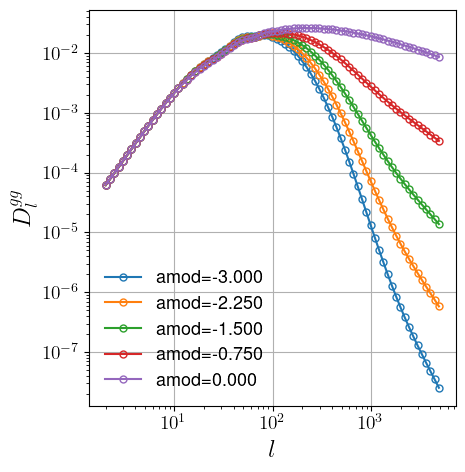

In [11]:
plt.figure(figsize=(5,5))

for ia,amod in enumerate(amod_ar):
    cl_gg = cl_gg_all[ia]['3x3']
    l = np.asarray(cl_gg['ell'])
    cl_gg_hf = np.asarray(cl_gg['hf'])
    plt.plot(l,cl_gg_hf,
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='-',
                label=r'amod=%.3f'%amod)



plt.xlabel('$l$', fontsize=18)
plt.ylabel('$D_l^{gg}$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')
plt.show()

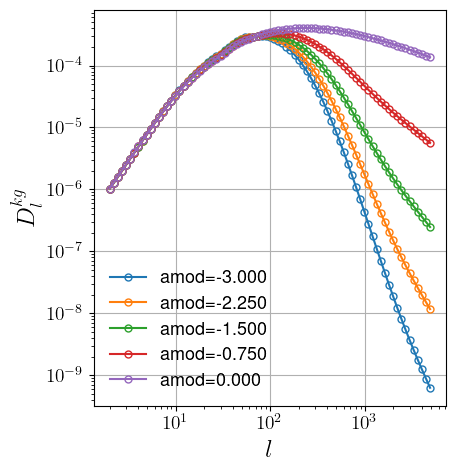

In [12]:
plt.figure(figsize=(5,5))

for ia,amod in enumerate(amod_ar):
    cl_gk = cl_gk_all[ia]['3']
    l = np.asarray(cl_gk['ell'])
    cl_gk_hf = np.asarray(cl_gk['hf'])
    plt.plot(l,cl_gk_hf,
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='-',
                label=r'amod=%.3f'%amod)



plt.xlabel('$l$', fontsize=18)
plt.ylabel('$D_l^{kg}$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')
plt.show()

# Carmen type modification

In [13]:
cosmo = Class()
cosmo.set(cosmo_params)
cosmo.set({
'output' : 'galn_galn_hf,galn_lens_hf',
'galaxy_samples_list_num' : 3, # the number of galaxy samples
'galaxy_samples_list' : '2,3,4', # the id string of each sample, can be any integer
'full_path_and_prefix_to_dndz_ngal':path_to_class_sz + '/class_sz/class-sz/class_sz_auxiliary_files/includes/WISC_bin3_ngal_example'
})
cosmo.set({# class_sz parameters:
    
'z_min' : 0.,
'z_max' : 1.5,

'effective_galaxy_bias_ngal_0' : 1.,
'effective_galaxy_bias_ngal_1' : 1.,
'effective_galaxy_bias_ngal_2' : 1.,
   
'dlogell' : 0.1,
'ell_max' : 5000.0,
'ell_min' : 2.0,
'redshift_epsrel' : 1e-4,
'ndim_redshifts': 30,
'ngal_ngal_auto_only' : 1, # only auto between several galaxy/tracer samples 
'non_linear' : 'hmcode',
# 'cosmo_model' : 1,
# 'use_pkl_in_linbias_calc':1
        })
        


True

In [14]:
%%time
cosmo.compute_class_szfast()

CPU times: user 301 ms, sys: 54.8 ms, total: 356 ms
Wall time: 261 ms


/Users/boris/venvdir/class_sz_312_brew/lib/python3.12/site-packages/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


In [17]:
cl_gg_all = []
cl_gk_all = []
A0_ar = np.linspace(0.1,2.,5)
for A0 in A0_ar:
    print(A0)
    cosmo.set({'output' : 'galn_galn_hf,galn_lens_hf',})

    cosmo.set({'pk_z_bins_z1': 0.1,
               'pk_z_bins_z2': 0.3,
               'pk_z_bins_A0': A0,
               'pk_z_bins_A1': 1.3,
               'pk_z_bins_A2': 2,
               'use_pk_z_bins':1,
               'use_pkl_in_linbias_calc':1})
    cosmo.compute_class_szfast()
    cl_gg_all.append(cosmo.cl_galn_galn())
    cl_gk_all.append(cosmo.cl_galn_lens())

0.1
0.575


/Users/boris/venvdir/class_sz_312_brew/lib/python3.12/site-packages/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


1.05
1.525
2.0


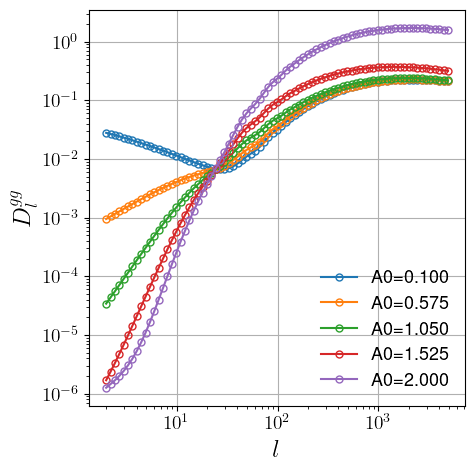

In [20]:
plt.figure(figsize=(5,5))

for ia,amod in enumerate(A0_ar):
    cl_gg = cl_gg_all[ia]['3x3']
    l = np.asarray(cl_gg['ell'])
    cl_gg_hf = np.asarray(cl_gg['hf'])
    plt.plot(l,cl_gg_hf,
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='-',
                label=r'A0=%.3f'%amod)



plt.xlabel('$l$', fontsize=18)
plt.ylabel('$D_l^{gg}$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')
plt.show()

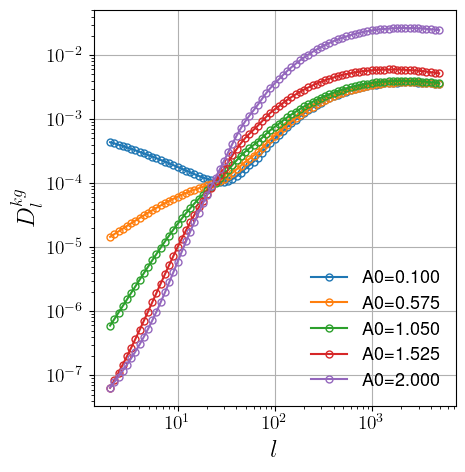

In [21]:
plt.figure(figsize=(5,5))

for ia,amod in enumerate(A0_ar):
    cl_gk = cl_gk_all[ia]['3']
    l = np.asarray(cl_gk['ell'])
    cl_gk_hf = np.asarray(cl_gk['hf'])
    plt.plot(l,cl_gk_hf,
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='-',
                label=r'A0=%.3f'%amod)



plt.xlabel('$l$', fontsize=18)
plt.ylabel('$D_l^{kg}$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')
plt.show()